## 손글씨 숫자 식별 모델
---
- 데 이 터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동   작 : 0 ~ 9 사이 숫자 판별

In [114]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

### [1] 데이터 로딩 및 준비

In [115]:
(x_train, y_train), (x_test, y_test) = load_data()

In [116]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape : {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
y_train.shape : (60000,), y_test.shape : (10000,)


In [117]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  stratify=y_train)

In [118]:
print(f'x_train.shape : {x_train.shape}, x_val.shape : {x_val.shape}')
print(f'y_train.shape : {y_train.shape}, y_val.shape : {y_val.shape}')


x_train.shape : (45000, 28, 28), x_val.shape : (15000, 28, 28)
y_train.shape : (45000,), y_val.shape : (15000,)


### [2] 데이터 전처리
---
- 수치 데이터   => 스케일링
- 범주형 데이터 => 원핫인코딩

In [119]:
# 저장된 값 확인
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  73, 153,
         254, 255, 254, 255, 242,  62,   0,   0,   0,   0,   0,   0,   0,
           0

In [120]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
x_train = x_train/255.0  # 실수로 나오게 하려고 .0 함
x_val = x_val/255.0
x_test = x_test/255.0

In [121]:
# 타겟 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [122]:
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1))

In [123]:
type(y_train)  # 희소 행렬

scipy.sparse.csr.csr_matrix

In [124]:
y_train = y_train.toarray()

In [125]:
print(f'y_train : {type(y_train)}\ny_train[0] : {y_train[0]}')

y_train : <class 'numpy.ndarray'>
y_train[0] : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [126]:
y_test = encoder.transform(y_test.reshape(-1,1))
y_val = encoder.transform(y_val.reshape(-1,1))

In [127]:
y_test = y_test.toarray()
y_val = y_val.toarray()

In [128]:
# Dense Layer 입력 형태로 변환 -------------------------
x_train.shape

(45000, 28, 28)

In [129]:
x_train = x_train.reshape(-1, 28*28)
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

In [130]:
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [131]:
x_val.shape, x_test.shape

((15000, 784), (10000, 784))

### [3] 모델 생성
---
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
---
- 입력 데이터 : 784 => 28 * 28 이미지 데이터
- 출력 데이터 : 10  => 0 ~ 9 숫자 라벨
- 학습 방 법 : 분류 - 다중분류

In [132]:
model = Sequential(name='MNIST_NNModel')

In [133]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 개수, 활성화함수, [옵]input_shape param
model.add( Dense(250, activation='relu', input_shape=(784,)))

In [134]:
model.add( Dropout(0.3))

In [135]:
model.add( Dense(100, activation='relu'))

In [136]:
model.add( Dropout(0.3))

In [137]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 개수, 활성화함수
model.add( Dense(10, activation='softmax'))

In [138]:
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               196250    
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               25100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


#### [3-2] 모델 생성
---
- loss 함수 => crossentropy
    * 이진분류 : binary_crossentropy
    * 다중분류 : sparse_categorical_crossentropy, categorical_crossentropy
- optimizer 기법 => 'rmsprop'
- metrics 평가항목 => 'loss'

In [139]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [4] 학습

In [140]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [141]:
stopCB = EarlyStopping(monitor='val_loss', patience=2)

In [142]:
MODEL_PATH = 'model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB = ModelCheckpoint(filepath=MODEL_PATH)  # 데이터가 많을 때 저장 해놓으려고 쓰는 거

In [143]:
his = model.fit(x_train, y_train,
                epochs=10,
                validation_data=(x_val, y_val),
                callbacks=[stopCB, modelCB])  # 많이 씀

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 0.3482 - accuracy: 0.8941 - val_loss: 0.1371 - val_accuracy: 0.9586
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1699 - accuracy: 0.9491 - val_loss: 0.1111 - val_accuracy: 0.9651
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1311 - accuracy: 0.9591 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1091 - accuracy: 0.9664 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.0835 - val_accuracy: 0.9745
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.0834 - val_accuracy: 0.9764
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0784 - accuracy: 0.9754 - val_loss: 0.0836 - val_accuracy:

In [144]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

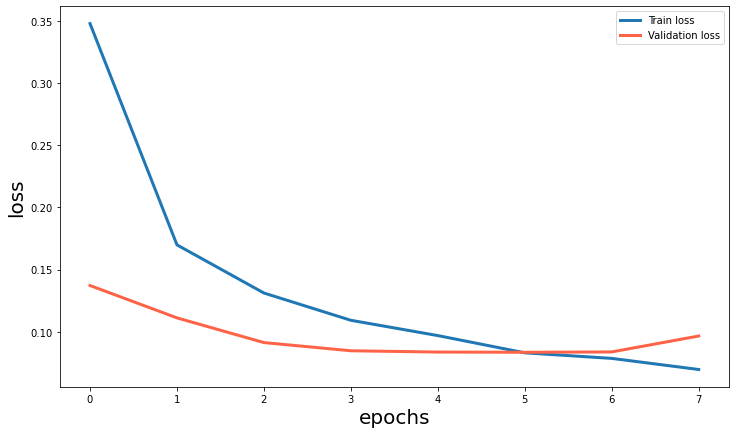

In [145]:
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['loss'], label='Train loss', linewidth=3)
plt.plot(his.epoch, his.history['val_loss'], label='Validation loss', color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.legend()
plt.show()

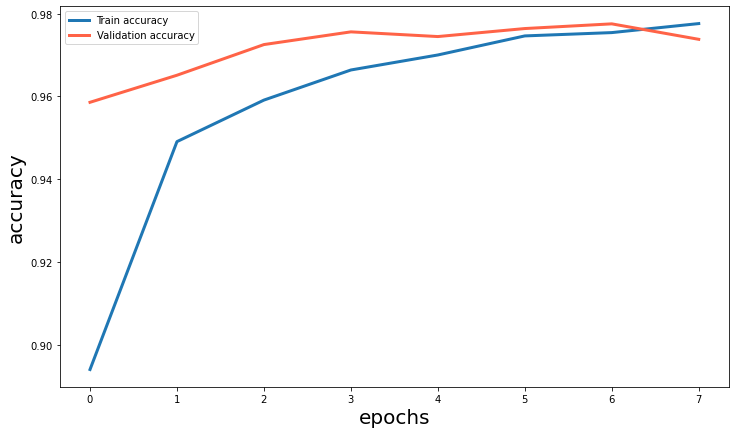

In [146]:
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy', linewidth=3)
plt.plot(his.epoch, his.history['val_accuracy'], label='Validation accuracy',color='tomato', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.legend()
plt.show()

### [5] 평가
---
- evaluate() 메서드
    * test data, target
    * 반환값 : loss, metrics에서 지정한 성능평가항목

In [147]:
test_result = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9755


In [148]:
x_test[0].shape, type(x_test[0]), x_test[0].reshape(-1,784)

((784,),
 numpy.ndarray,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         

### [6] 테스트/예측

In [149]:
pre_label = model.predict(x_test[0].reshape(-1,784))

1/1 [==============================] - 0s 83ms/step


In [150]:
import numpy as np
np.round(pre_label, 2)   # 예측?

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [151]:
y_test[0]   # 실제?

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

- 마지막에 저장하는 거까지가 원래 끝임 
- model.save()  ???